<a href="https://colab.research.google.com/github/pavel195/THBD/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
# Загрузка файла passengers.csv
passengers_full = pd.read_csv('data/passengers.csv')

# Преобразование столбца 'Month' в формат datetime
passengers_full['Month'] = pd.to_datetime(passengers_full['Month'])

# Установка столбца 'Month' в качестве индекса
passengers_full.set_index('Month', inplace=True)

# Отображение первых нескольких строк для проверки данных
print(passengers_full.head())


            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [10]:
## Задача 1: Анализ годовой сезонности для полного набора данных

#В этой задаче мы построим график, демонстрирующий годовую сезонность пассажиропотока.
# Построение графика годовой сезонности
plt.figure(figsize=(10, 6))
plt.plot(passengers_full.index, passengers_full['#Passengers'], marker='o', linestyle='-')
plt.title('Годовая сезонность данных о пассажиропотоке')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.grid(True)
plt.savefig('yearly_seasonality.png')  # Сохранение графика вместо отображения
plt.close()  # Закрытие фигуры

# Вывод текста с описанием графика
text = (
    'График демонстрирует четкую сезонность в данных о пассажиропотоке. '
    'Наблюдаются повторяющиеся пики в летние месяцы и спады в зимний период, '
    'что свидетельствует о типичных колебаниях спроса на транспортные услуги. '
    'В общем, можно выделить ежегодную тенденцию к увеличению общего числа пассажиров.'
)

sentences = text.split('. ')
formatted_text = '.\n'.join(sentences)

print(formatted_text)


График демонстрирует четкую сезонность в данных о пассажиропотоке.
Наблюдаются повторяющиеся пики в летние месяцы и спады в зимний период, что свидетельствует о типичных колебаниях спроса на транспортные услуги.
В общем, можно выделить ежегодную тенденцию к увеличению общего числа пассажиров.


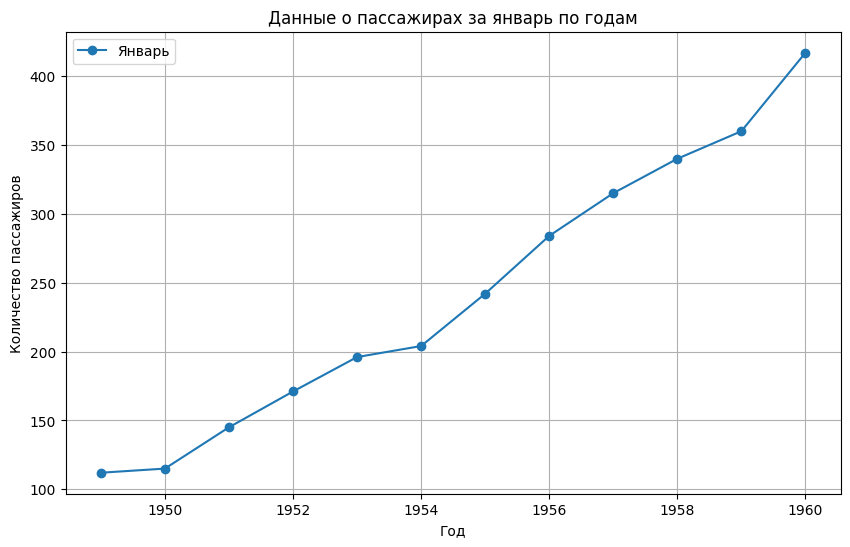

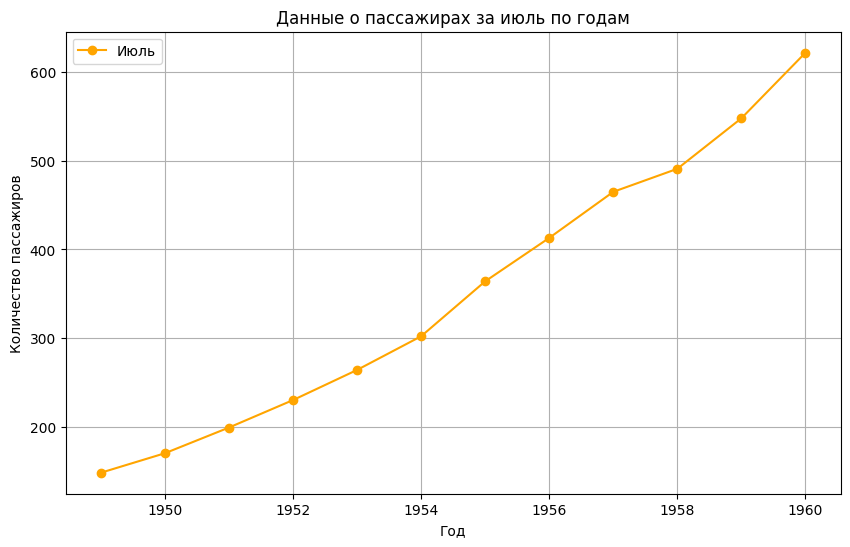

Графики для января и июля по разным годам показывают, что летом (в июле) количество пассажиров традиционно выше, чем в январе.
Это подтверждает сезонные колебания с пиками летом, вероятно, из-за отпусков и активного сезона путешествий.


In [11]:
## Задача 2: Исследование данных за январь и июль в разные годы
# Извлечение данных за январь и июль из полного набора данных
january_data = passengers_full[passengers_full.index.month == 1]
july_data = passengers_full[passengers_full.index.month == 7]

# Построение графика данных за январь
plt.figure(figsize=(10, 6))
plt.plot(january_data.index.year, january_data['#Passengers'], marker='o', linestyle='-', label='Январь')
plt.title('Данные о пассажирах за январь по годам')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('january_passengers.png')
plt.close()

# Построение графика данных за июль
plt.figure(figsize=(10, 6))
plt.plot(july_data.index.year, july_data['#Passengers'], marker='o', linestyle='-', color='orange', label='Июль')
plt.title('Данные о пассажирах за июль по годам')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('july_passengers.png')
plt.close()

# Вывод текста с описанием графиков
text = (
    'Графики для января и июля по разным годам показывают, что летом (в июле) количество пассажиров '
    'традиционно выше, чем в январе. Это подтверждает сезонные колебания с пиками летом, '
    'вероятно, из-за отпусков и активного сезона путешествий.'
)

sentences = text.split('. ')
formatted_text = '.\n'.join(sentences)

print(formatted_text)


In [12]:
## Задача 3: Вычисление среднего и дисперсии для каждого года

#В этой задаче мы рассчитаем среднее количество пассажиров и дисперсию для каждого года.
# Группировка данных по годам и вычисление среднего и дисперсии
yearly_stats = passengers_full.resample('YE').agg(['mean', 'var'])

# Переименование столбцов для ясности
yearly_stats.columns = ['Mean_Passengers', 'Variance_Passengers']

# Отображение таблицы пользователю
print("Годовая статистика пассажиров:")
print(yearly_stats)

# Вывод текста с описанием статистики
text = (
    'Средние значения и дисперсии для каждого года показывают, что с течением времени количество пассажиров '
    'увеличивается, а дисперсия данных становится более выраженной, что указывает на большую изменчивость '
    'пассажиропотока в более поздние годы.'
)

sentences = text.split('. ')
formatted_text = '.\n'.join(sentences)

print(formatted_text)


Годовая статистика пассажиров:
            Mean_Passengers  Variance_Passengers
Month                                           
1949-12-31       126.666667           188.242424
1950-12-31       139.666667           363.696970
1951-12-31       170.166667           339.969697
1952-12-31       197.000000           527.454545
1953-12-31       225.000000           810.363636
1954-12-31       238.916667          1219.719697
1955-12-31       284.000000          1775.818182
1956-12-31       328.250000          2290.750000
1957-12-31       368.416667          3351.356061
1958-12-31       381.000000          4164.181818
1959-12-31       428.333333          4876.242424
1960-12-31       476.166667          6043.060606
Средние значения и дисперсии для каждого года показывают, что с течением времени количество пассажиров увеличивается, а дисперсия данных становится более выраженной, что указывает на большую изменчивость пассажиропотока в более поздние годы.


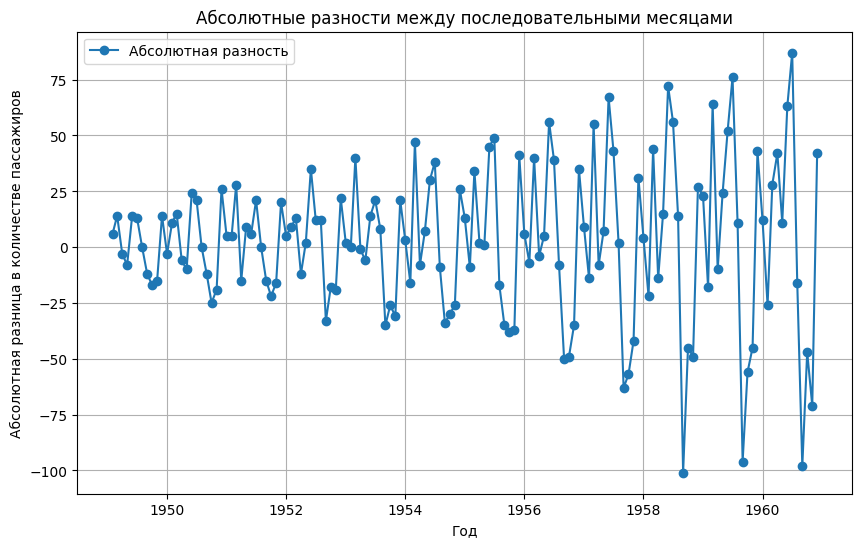

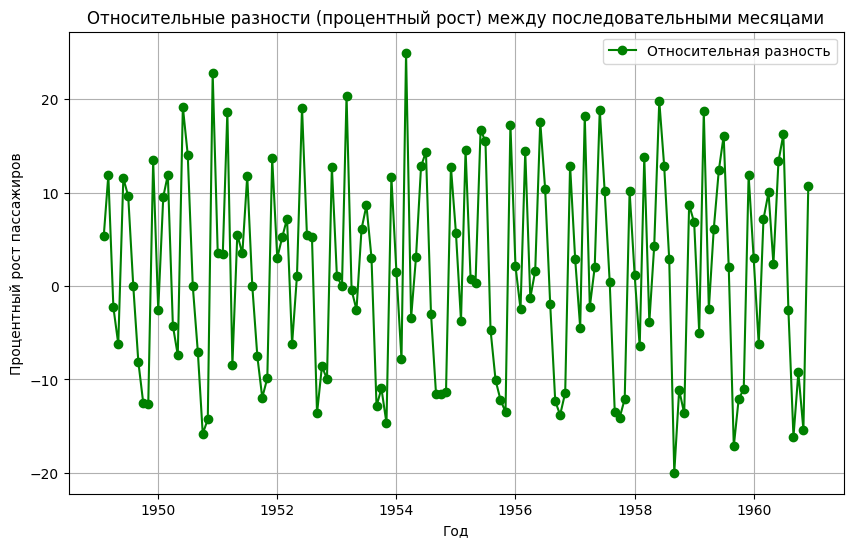

Графики абсолютных и относительных разностей между соседними месяцами показывают динамику изменений пассажиропотока.
Абсолютные разности позволяют видеть численные изменения пассажиропотока между месяцами, в то время как относительные разности (в процентах) показывают, насколько интенсивно происходят изменения в каждом месяце.


In [13]:
## Задача 4: Вычисление абсолютных и относительных разностей между последовательными месяцами

#В этой задаче мы рассчитаем абсолютные разности (численные изменения) и относительные разности (процентный рост) количества пассажиров между последовательными месяцами.
# Задача 4a: Вычисление абсолютных разностей между последовательными месяцами
absolute_diff = passengers_full['#Passengers'].diff()

# Построение графика абсолютных разностей
plt.figure(figsize=(10, 6))
plt.plot(passengers_full.index, absolute_diff, marker='o', linestyle='-', label='Абсолютная разность')
plt.title('Абсолютные разности между последовательными месяцами')
plt.xlabel('Год')
plt.ylabel('Абсолютная разница в количестве пассажиров')
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('absolute_differences.png')
plt.close()

# Задача 4b: Вычисление относительных разностей (процентного роста) между последовательными месяцами
relative_diff = passengers_full['#Passengers'].pct_change() * 100

# Построение графика относительных разностей
plt.figure(figsize=(10, 6))
plt.plot(passengers_full.index, relative_diff, marker='o', linestyle='-', color='green', label='Относительная разность')
plt.title('Относительные разности (процентный рост) между последовательными месяцами')
plt.xlabel('Год')
plt.ylabel('Процентный рост пассажиров')
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('relative_differences.png')
plt.close()

# Вывод текста с описанием графиков
text = (
    'Графики абсолютных и относительных разностей между соседними месяцами показывают динамику изменений '
    'пассажиропотока. Абсолютные разности позволяют видеть численные изменения пассажиропотока между месяцами, '
    'в то время как относительные разности (в процентах) показывают, насколько интенсивно происходят изменения в каждом месяце.'
)

sentences = text.split('. ')
formatted_text = '.\n'.join(sentences)

print(formatted_text)


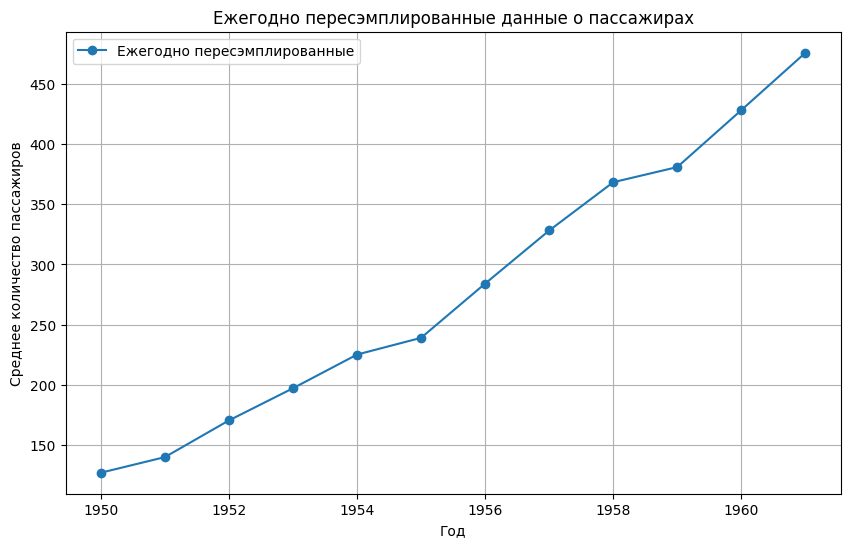

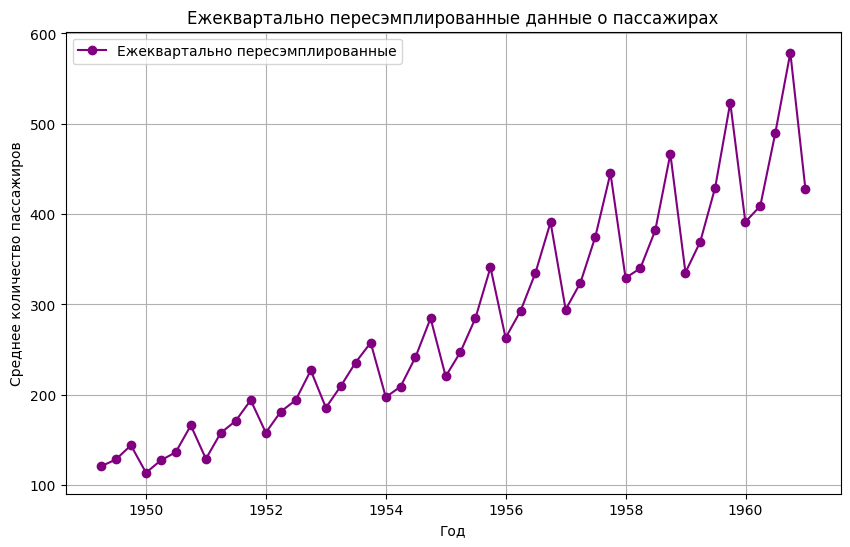

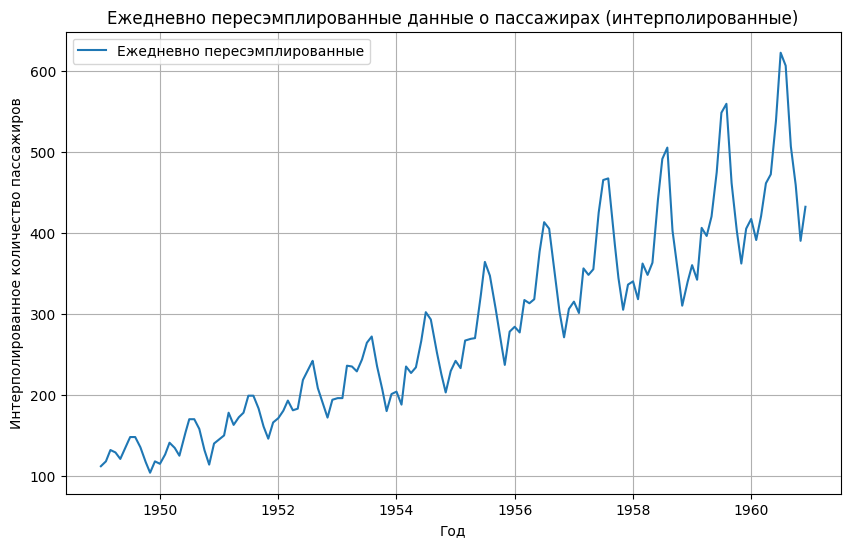

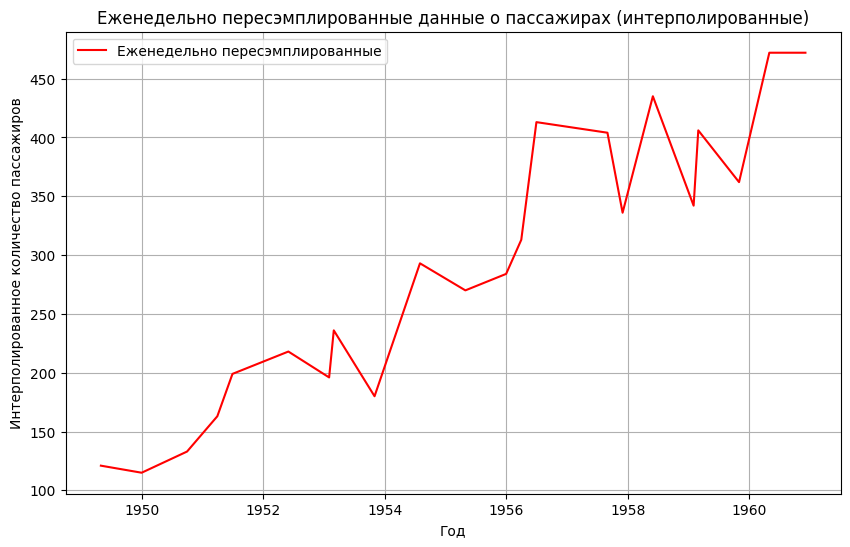

Графики с повышенной частотой (дневной и недельной), полученные методом линейной интерполяции, дают детализированную картину изменений, но не содержат дополнительной информации, поскольку исходные данные представлены на месячном уровне.
Использование такой частоты целесообразно только при наличии данных с более частой фиксацией событий.


In [14]:
## Задача 5: Пересэмплирование данных до более низкой и более высокой частоты

### Задача 5a: Пересэмплирование до более низкой частоты (ежегодно и ежеквартально)

#Мы пересэмплируем данные до ежегодной (`YE`) и ежеквартальной (`QE`) частоты, рассчитывая среднее количество пассажиров за соответствующие периоды.

### Задача 5b: Пересэмплирование до более высокой частоты (ежедневно и еженедельно)

#Мы пересэмплируем данные до ежедневной (`D`) и еженедельной (`W`) частоты с использованием линейной интерполяции для заполнения пропущенных значений.
# Задача 5a: Пересэмплирование данных до более низкой частоты (ежегодно и ежеквартально)

# Ежегодное пересэмплирование (среднее количество пассажиров в год)
yearly_resampled = passengers_full.resample('YE').mean()

# Ежеквартальное пересэмплирование (среднее количество пассажиров в квартал)
quarterly_resampled = passengers_full.resample('QE').mean()

# Построение графика ежегодно пересэмплированных данных
plt.figure(figsize=(10, 6))
plt.plot(yearly_resampled.index, yearly_resampled['#Passengers'], marker='o', linestyle='-', label='Ежегодно пересэмплированные')
plt.title('Ежегодно пересэмплированные данные о пассажирах')
plt.xlabel('Год')
plt.ylabel('Среднее количество пассажиров')
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('yearly_resampled.png')
plt.close()

# Построение графика ежеквартально пересэмплированных данных
plt.figure(figsize=(10, 6))
plt.plot(quarterly_resampled.index, quarterly_resampled['#Passengers'], marker='o', linestyle='-', color='purple', label='Ежеквартально пересэмплированные')
plt.title('Ежеквартально пересэмплированные данные о пассажирах')
plt.xlabel('Год')
plt.ylabel('Среднее количество пассажиров')
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('quarterly_resampled.png')
plt.close()

# Задача 5b: Пересэмплирование данных до более высокой частоты (ежедневно и еженедельно)

# Ежедневное пересэмплирование (линейная интерполяция для заполнения пропущенных значений)
daily_resampled = passengers_full.resample('D').interpolate()

# Еженедельное пересэмплирование (линейная интерполяция)
weekly_resampled = passengers_full.resample('W').interpolate()

# Построение графика ежедневно пересэмплированных данных
plt.figure(figsize=(10, 6))
plt.plot(daily_resampled.index, daily_resampled['#Passengers'], linestyle='-', label='Ежедневно пересэмплированные')
plt.title('Ежедневно пересэмплированные данные о пассажирах (интерполированные)')
plt.xlabel('Год')
plt.ylabel('Интерполированное количество пассажиров')
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('daily_resampled.png')
plt.close()

# Построение графика еженедельно пересэмплированных данных
plt.figure(figsize=(10, 6))
plt.plot(weekly_resampled.index, weekly_resampled['#Passengers'], linestyle='-', color='red', label='Еженедельно пересэмплированные')
plt.title('Еженедельно пересэмплированные данные о пассажирах (интерполированные)')
plt.xlabel('Год')
plt.ylabel('Интерполированное количество пассажиров')
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('weekly_resampled.png')
plt.close()

# Вывод текста с описанием графиков
text = (
    'Графики с повышенной частотой (дневной и недельной), полученные методом линейной интерполяции, '
    'дают детализированную картину изменений, но не содержат дополнительной информации, поскольку исходные данные '
    'представлены на месячном уровне. Использование такой частоты целесообразно только при наличии данных с более частой '
    'фиксацией событий.'
)

sentences = text.split('. ')
formatted_text = '.\n'.join(sentences)

print(formatted_text)
